# Instituto Tecnológico Autónomo de México

### (MAT -34420) METODOS NUMÉRICOS Y OPTIMIZACIÓN

### Proyecto Final: "Simulated Annealing aplicado al problema del Comerciante Viajero (TSP)"

Paredes Reséndiz Iván \
Tapia Godinez José Antonio \
Venegas Sánchez Gabriela Patricia


In [18]:
# Instalamos Folium que surve para la creación de mapas web interactivos en Python y Leaflet
!pip install folium

In [19]:
# Instalamos paqueteria basica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image #El módulo Imagen proporciona una clase con el mismo nombre que se utiliza para representar una imagen PIL
from matplotlib.animation import FuncAnimation
import csv

In [20]:
#  Tomamos las ciudades desde el archivo CSV, las ciudades elegidas son las de méxico con mas de cien mil habitantes.
all_cities_df = pd.read_csv("data/mexicocities.csv")

In [21]:
# Usamos todas las ciudades de México
cities_df = all_cities_df

# DataFrame con las ciudades seleccionadas
selected_cities_df = pd.DataFrame({
    'Ciudad': cities_df['city'],
    'País': cities_df['country'],
    'Latitud': cities_df['lat'],
    'Longitud': cities_df['lng'],
    'Población': cities_df['population']
})

#El punto de inicio siempre es México
print(selected_cities_df)


                           Ciudad    País  Latitud  Longitud  Población
0                     Mexico City  Mexico  19.4333  -99.1333   21804000
1                     Guadalajara  Mexico  20.6767 -103.3475    5525000
2                       Monterrey  Mexico  25.6667 -100.3000    5341171
3                          Puebla  Mexico  19.0333  -98.1833    1576259
4                        Mexicali  Mexico  32.6633 -115.4678    1102342
5                         Morelia  Mexico  19.7683 -101.1894     962555
6                  Aguascalientes  Mexico  21.8760 -102.2960     934424
7                          Merida  Mexico  20.9700  -89.6200     892363
8                       Chihuahua  Mexico  28.6353 -106.0889     878062
9                        Saltillo  Mexico  25.4231 -100.9919     864431
10                     Hermosillo  Mexico  29.0989 -110.9542     855563
11                       Culiacan  Mexico  24.8069 -107.3939     808416
12                      Queretaro  Mexico  20.5875 -100.3928    

In [22]:
import folium

# Crear un mapa centrado en las coordenadas de la primera ciudad
map_center = [selected_cities_df.iloc[0]['Latitud'], selected_cities_df.iloc[0]['Longitud']]
gmap = folium.Map(location=map_center, zoom_start=5)

# Agregar un marcador para cada ciudad en el DataFrame
for _, city in selected_cities_df.iterrows():
    folium.Marker(
        location=[city['Latitud'], city['Longitud']],
        popup=f"{city['Ciudad']}, {city['País']}\nPoblación: {city['Población']}"
    ).add_to(gmap)

# Guardar el mapa como un archivo HTML en la carpeta 'data'
html_path = 'data/cities_map.html'
gmap.save(html_path)


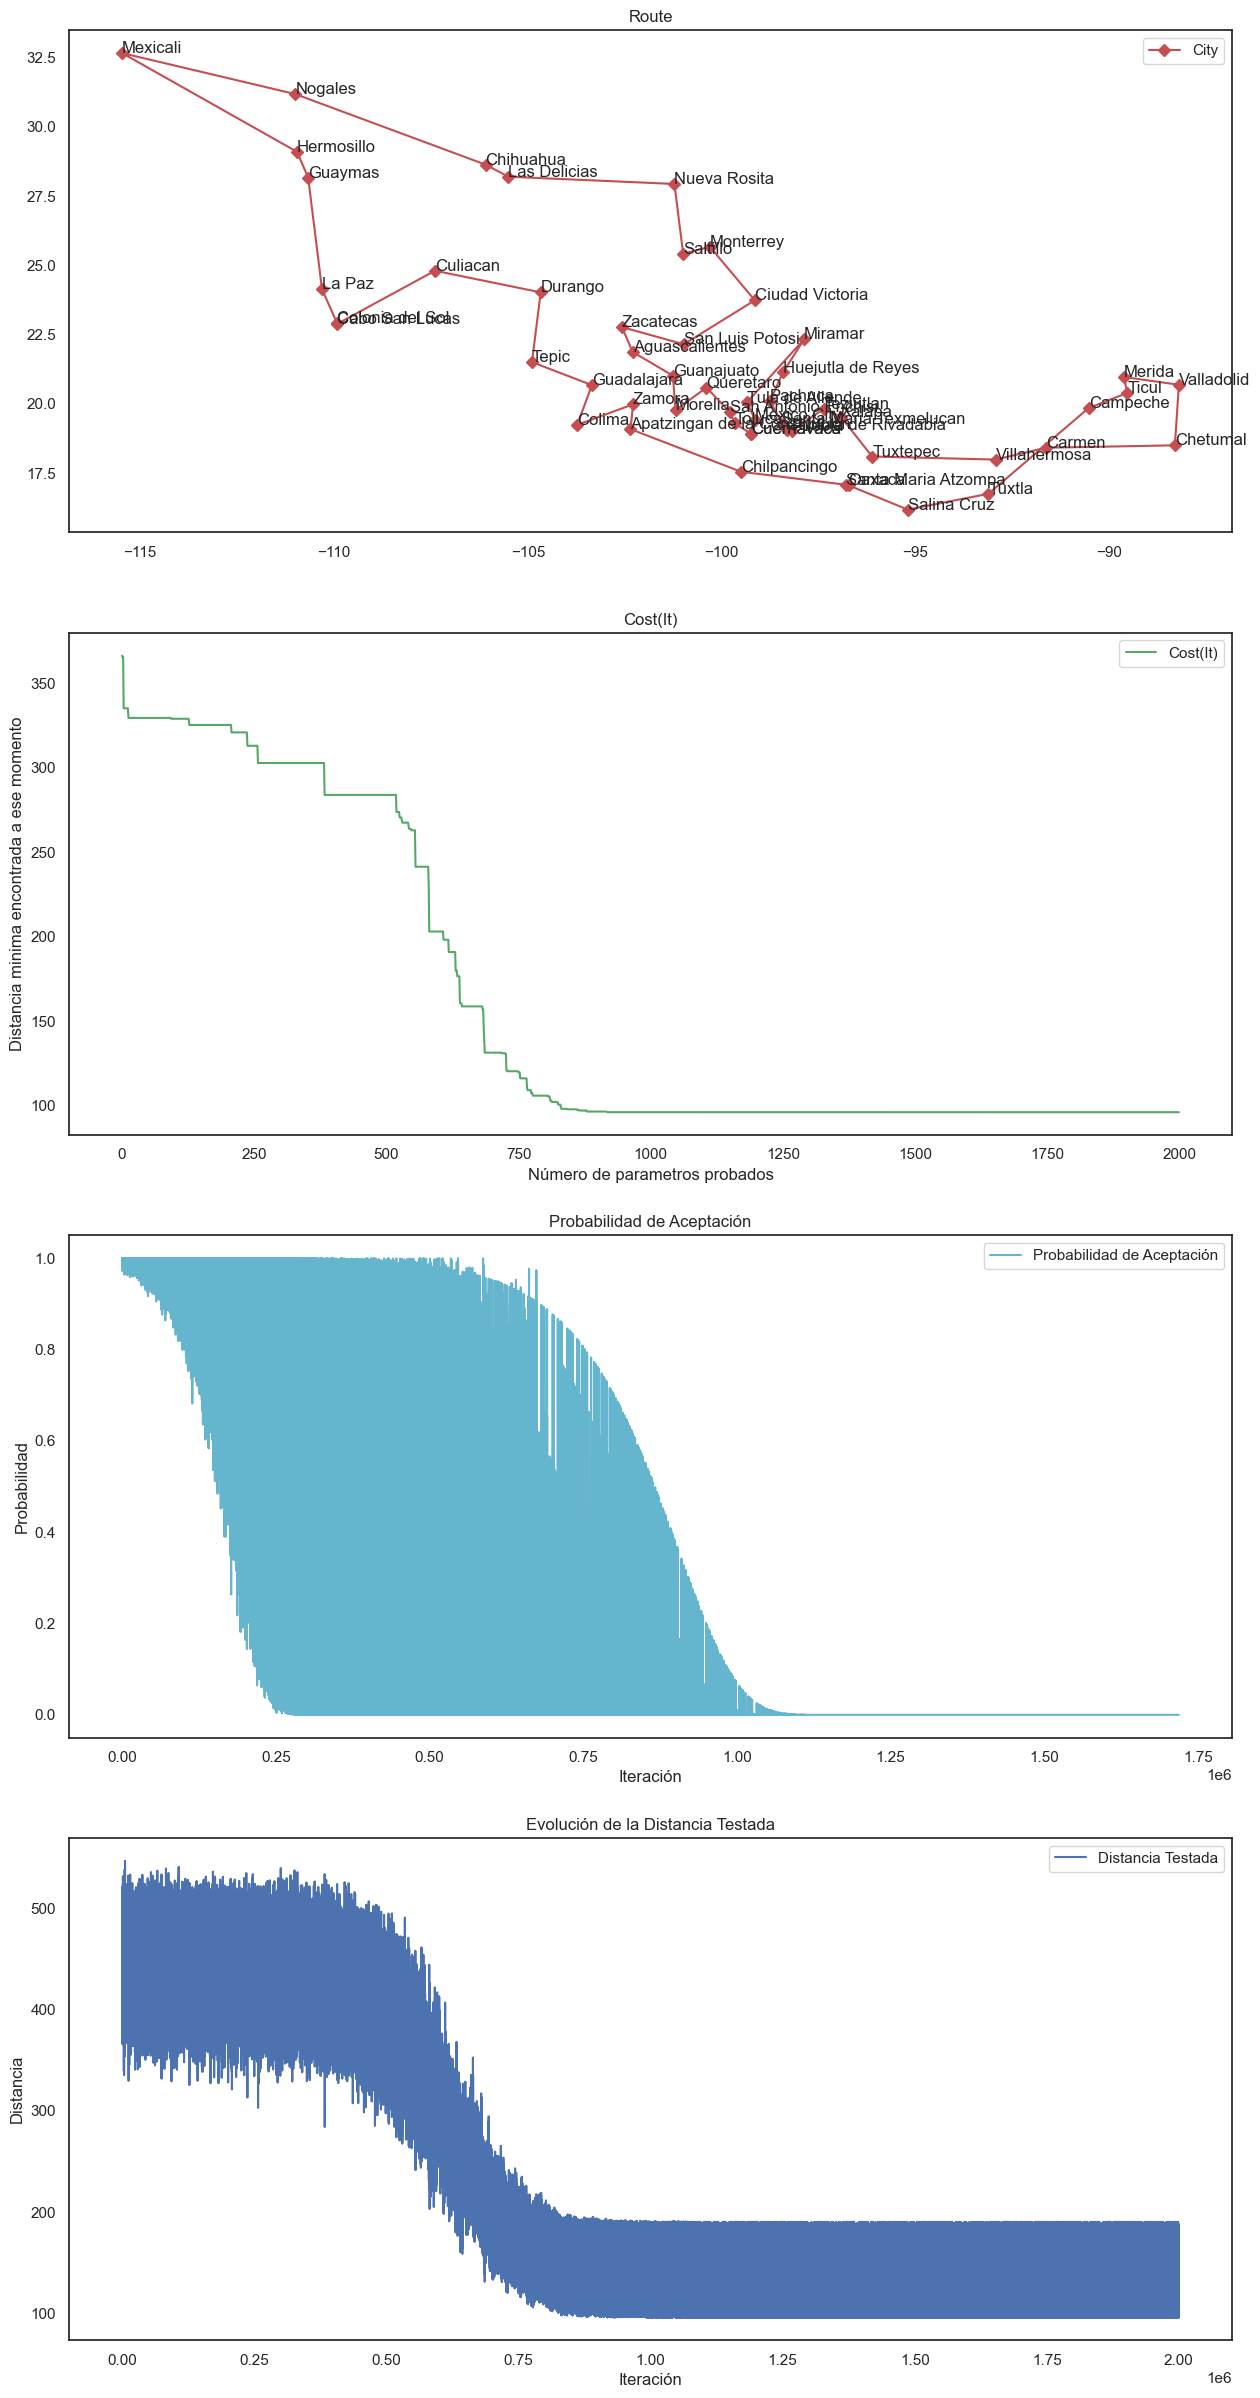

La mejor ruta: [19 27 42 12  5 30  6 41 13 20  2  9 50 43  8 23  4 10 35 25 48 46 11 14
 17  1 36 28 37 29 49 21 45 15 24 51  7 47 33 26 18 34 16 31  3 38 32 22
 39 40 44  0]
Distancia total: 96.143 km


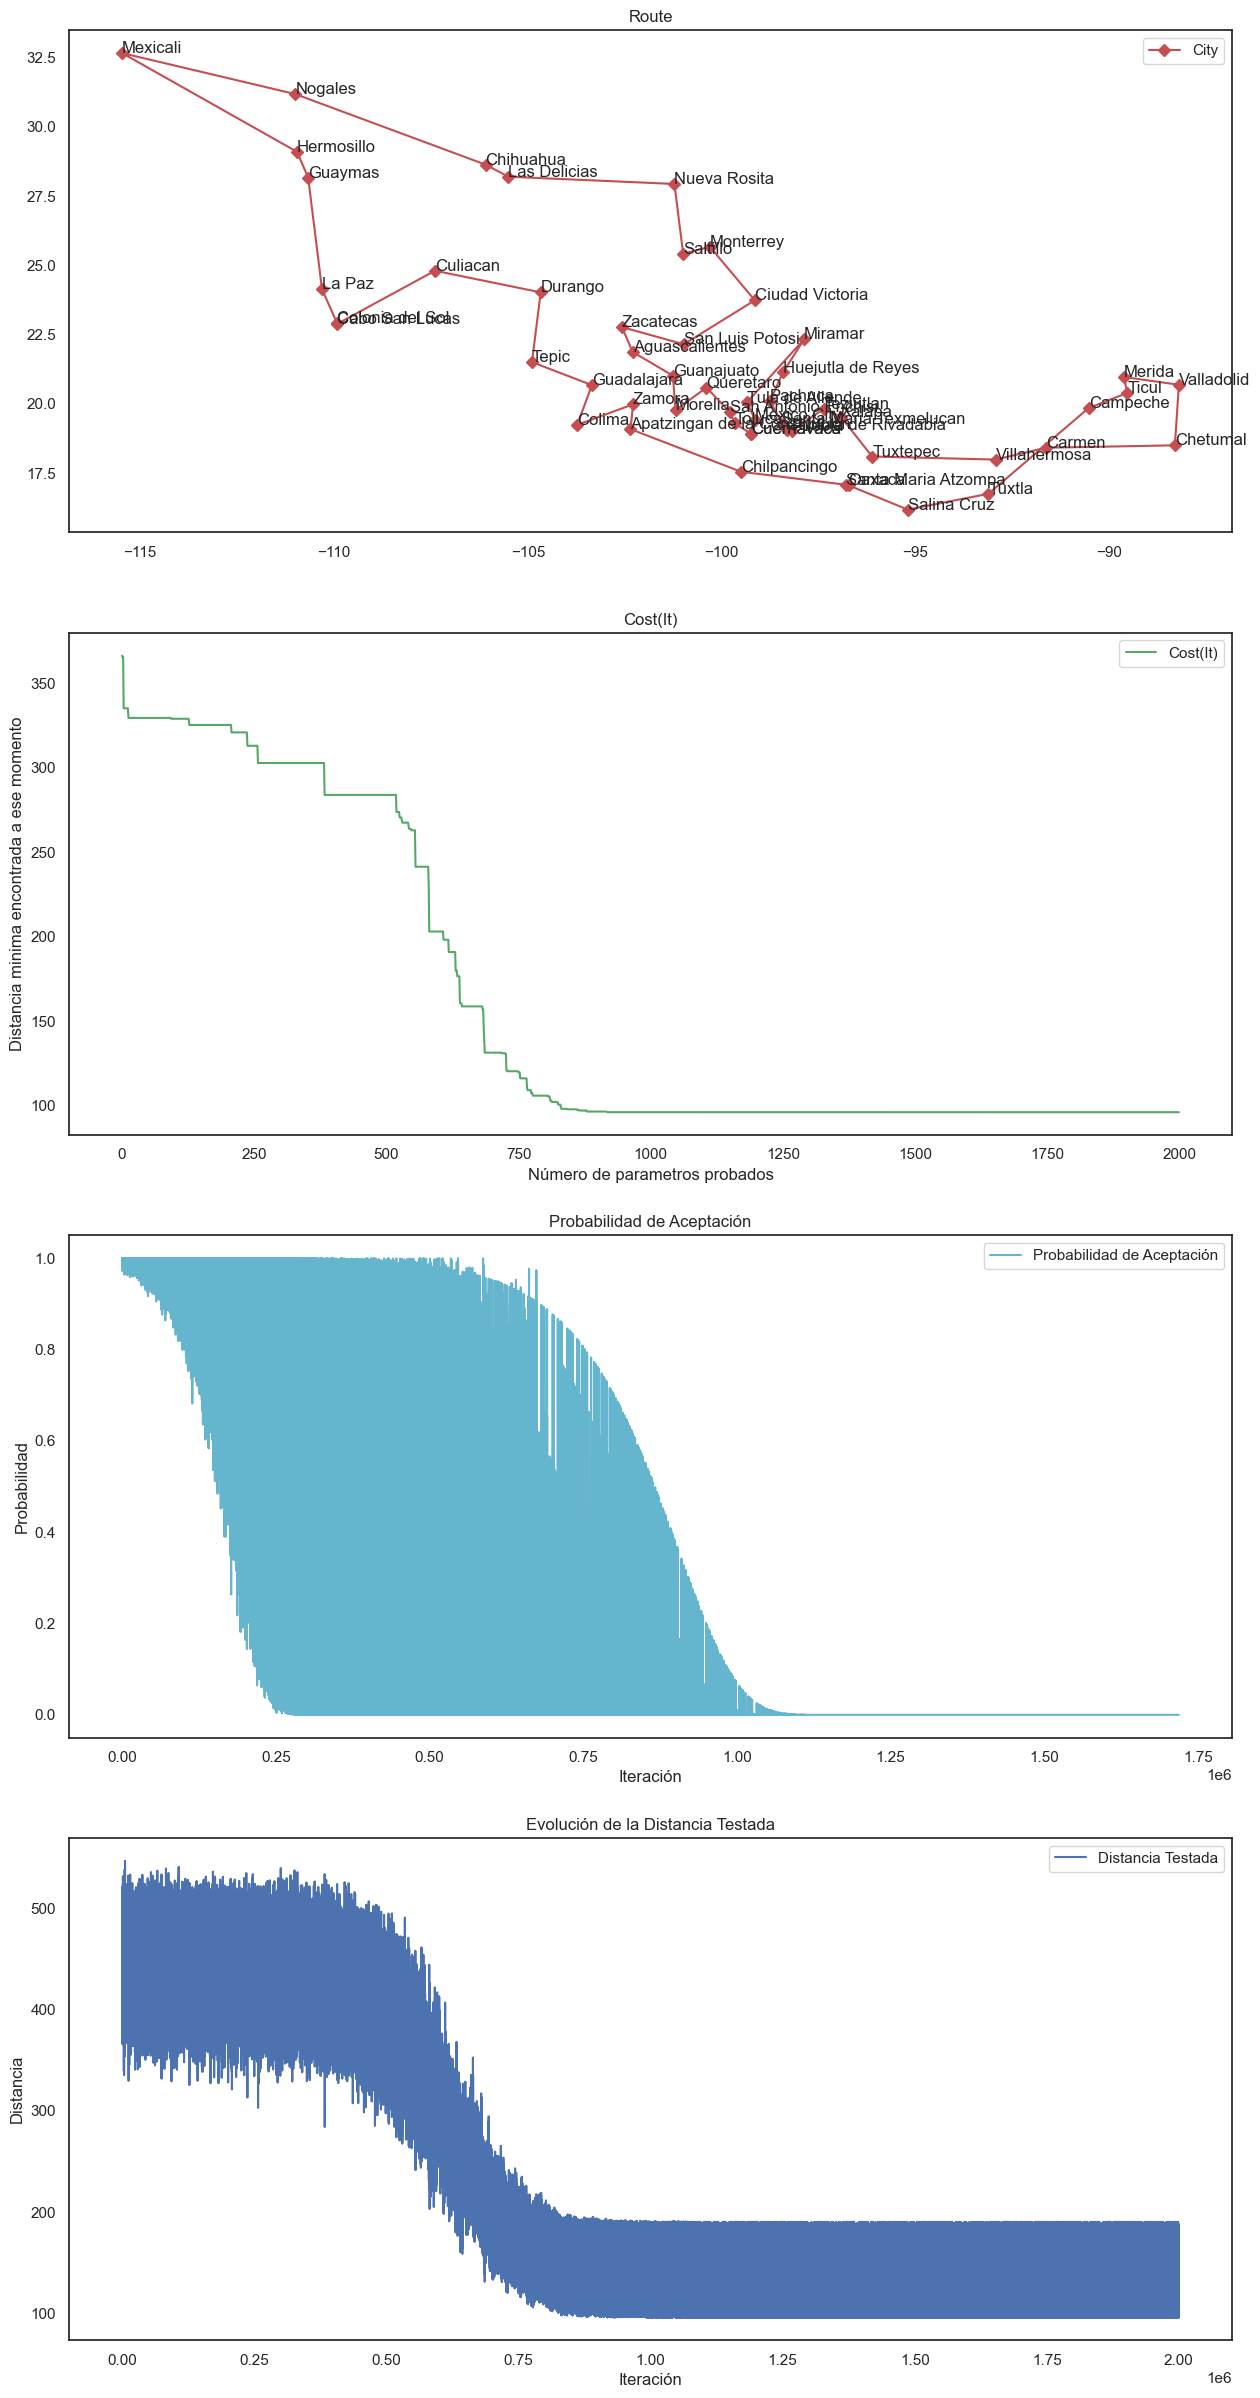

La mejor ruta: [19 27 42 12  5 30  6 41 13 20  2  9 50 43  8 23  4 10 35 25 48 46 11 14
 17  1 36 28 37 29 49 21 45 15 24 51  7 47 33 26 18 34 16 31  3 38 32 22
 39 40 44  0]
Distancia total: 96.143 km


In [23]:

# Establecer el estilo en blanco
sns.set(style="white")

#Definimos una clase: Las clases proporcionan un medio para agrupar datos y funcionalidades. La creación de una nueva clase crea un nuevo tipo de objeto, lo que permite crear nuevas instancias de ese tipo.
#https://docs.python.org/3/tutorial/classes.html

class SA(object):
    def __init__(self, cities_df, maxit, maxitpermtemp, T): #Definimos las ciudades, la temperatura y la el maximo permitido
        self.n = len(cities_df)
        self.maxitpermtemp = maxitpermtemp
        self.cities_df = cities_df
        self.D = np.zeros((self.n, self.n))
        self.tour = np.random.permutation(self.n)
        self.bestcost = np.zeros((maxit, 1))
        self.T = T

        for i in range(self.n - 1):
            for j in range(self.n):
                self.D[i, j] = np.sqrt(
                    (self.cities_df.iloc[i]["lng"] - self.cities_df.iloc[j]["lng"])**2 +
                    (self.cities_df.iloc[i]["lat"] - self.cities_df.iloc[j]["lat"])**2
                )
                self.D[j, i] = self.D[i, j]

    def swap(self, route):
        ix = np.random.permutation(len(route))
        i1, i2 = ix[1], ix[2]
        newroute = np.copy(route)
        newroute[i1], newroute[i2] = newroute[i2], newroute[i1]
        return newroute

    def cost(self, route):
        L = 0
        route = np.append(route, route[0])
        for i in range(self.n):
            L = L + self.D[route[i], route[i + 1]]
        return L

    def main(self):
        sol_tour = self.tour
        sol_cost = self.cost(sol_tour)
        bestsol_tour = sol_tour
        bestsol_cost = sol_cost
        tested_distances = []  # Lista para almacenar las distancias testadas
        acceptance_probabilities = []  # Lista para almacenar las probabilidades de aceptación

        for it in range(len(self.bestcost)):
            for it2 in range(self.maxitpermtemp):
                newsol_tour = self.swap(sol_tour)
                newsol_cost = self.cost(newsol_tour)

                if newsol_cost < sol_cost:
                    sol_cost = newsol_cost
                    sol_tour = newsol_tour
                else:
                    delta = (newsol_cost - sol_cost)
                    p = np.exp(-delta / self.T)
                    acceptance_probabilities.append(p)  # Almacenar la probabilidad de aceptación

                    if np.random.rand() < p:
                        sol_cost = newsol_cost
                        sol_tour = newsol_tour

                if sol_cost < bestsol_cost:
                    bestsol_cost = sol_cost
                    bestsol_tour = sol_tour
                
                tested_distances.append(newsol_cost)  # Almacenar la distancia testada

            self.bestcost[it] = bestsol_cost
            self.T = self.T * 0.99

        self.draw(bestsol_tour, tested_distances, acceptance_probabilities)  # Pasar los datos a la función de dibujo

        print("La mejor ruta:", bestsol_tour)
        print("Distancia total: {} km".format(bestsol_cost.round(3)))

        self.draw(bestsol_tour, tested_distances, acceptance_probabilities)

        print("La mejor ruta:", bestsol_tour)
        print("Distancia total: {} km".format(bestsol_cost.round(3)))

    def draw(self, tour, tested_distances, acceptance_probabilities):
        tour = np.append(tour, tour[0])
        plt.figure(figsize=(15, 30))

        # Dibujar la ruta
        plt.subplot(4, 1, 1)
        plt.plot(self.cities_df.iloc[tour]["lng"], self.cities_df.iloc[tour]["lat"], 'rD-', label="City")
        for i, city in enumerate(tour):
            plt.text(
                self.cities_df.iloc[city]["lng"],
                self.cities_df.iloc[city]["lat"],
                f"{self.cities_df.iloc[city]['city']}"
            )
        plt.title("Route")
        plt.legend(loc="best")

        # Dibujar la evolución del costo
        plt.subplot(4, 1, 2)
        plt.plot(self.bestcost, 'g', label="Cost(It)")
        plt.title("Cost(It)")
        plt.legend(loc="best")
        plt.xlabel('Número de parametros probados')
        plt.ylabel('Distancia minima encontrada a ese momento')

        # Nueva subtrama para la probabilidad de aceptación
        plt.subplot(4, 1, 3)
        plt.plot(acceptance_probabilities, 'c', label="Probabilidad de Aceptación")
        plt.title("Probabilidad de Aceptación")
        plt.xlabel('Iteración')
        plt.ylabel('Probabilidad')
        plt.legend(loc="best")

        plt.savefig('data/costo.png')

        
        plt.subplot(4, 1, 4)
        plt.plot(tested_distances, 'b', label="Distancia Testada")
        plt.title("Evolución de la Distancia Testada")
        plt.xlabel('Iteración')
        plt.ylabel('Distancia')
        plt.legend(loc="best")

        plt.savefig('data/costo.png')
        plt.show()

        # Guardar las coordenadas en un archivo CSV
        route_coordinates = self.cities_df.iloc[tour][['lat', 'lng']].values
        with open('data/ruta_optima.csv', 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(['lat', 'lng'])
            csvwriter.writerows(route_coordinates)
        
        
# Crear una instancia de SA y ejecutar el algoritmo
TSP = SA(cities_df=cities_df, maxit=2000, maxitpermtemp=1000, T=2000)
TSP.main()

In [14]:
meteorite = pd.read_csv("data/ruta_optima.csv")
meteorite.head()

,lat,lng
0,29.0989,-110.9542
1,28.1667,-110.6667
2,22.7736,-102.5736
3,20.6767,-103.3475
4,24.0250,-104.6675


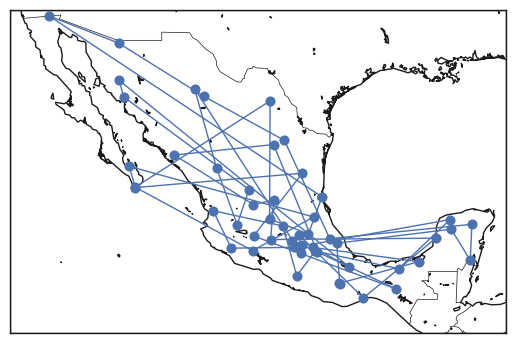

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Leer los datos desde el CSV
archivo_csv = 'data/ruta_optima.csv'  # Reemplaza con el nombre de tu archivo
datos = pd.read_csv(archivo_csv)

# Crear un mapa básico
mapa = Basemap(projection='merc', lat_0=0, lon_0=0,
               resolution='l', area_thresh=0.1,
               llcrnrlon=-118, llcrnrlat=14,
               urcrnrlon=-86, urcrnrlat=33)

# Dibujar costas, países y límites
mapa.drawcoastlines()
mapa.drawcountries()
mapa.drawmapboundary()

# Variables para almacenar las coordenadas transformadas
x_prev, y_prev = None, None

# Iterar sobre las filas del DataFrame
for indice, fila in datos.iterrows():
    lon, lat = fila['lng'], fila['lat']
    x, y = mapa(lon, lat)
    mapa.plot(x, y, 'bo', markersize=5)

    # Dibujar línea desde el punto anterior a este punto
    if x_prev is not None and y_prev is not None:
        plt.plot([x_prev, x], [y_prev, y], color='b', linewidth=1, marker='o')

    x_prev, y_prev = x, y

plt.show()

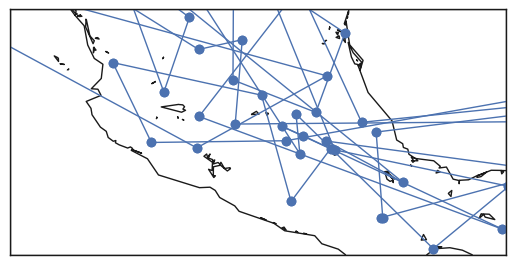

In [16]:
#Acercamos el mapa
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Leer los datos desde el CSV
archivo_csv = 'data/ruta_optima.csv'  # Reemplaza con el nombre de tu archivo
datos = pd.read_csv(archivo_csv)

# Crear un mapa básico
mapa = Basemap(projection='merc', lat_0=0, lon_0=0,
               resolution='l', area_thresh=0.1,
               llcrnrlon=-108, llcrnrlat=16,
               urcrnrlon=-93, urcrnrlat=23)
# Dibujar costas, países y límites
mapa.drawcoastlines()
mapa.drawcountries()
mapa.drawmapboundary()

# Variables para almacenar las coordenadas transformadas
x_prev, y_prev = None, None

# Iterar sobre las filas del DataFrame
for indice, fila in datos.iterrows():
    lon, lat = fila['lng'], fila['lat']
    x, y = mapa(lon, lat)
    mapa.plot(x, y, 'bo', markersize=5)

    # Dibujar línea desde el punto anterior a este punto
    if x_prev is not None and y_prev is not None:
        plt.plot([x_prev, x], [y_prev, y], color='b', linewidth=1, marker='o')

    x_prev, y_prev = x, y

plt.show()